In [ ]:
# https://colab.research.google.com/drive/1miTwneBr2b8oGUnlYpelI0OvLy_5ERQ7
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()
# print(iris)
iris_X = iris.data
iris_y = iris.target
print('Number of classes: %d' %len(np.unique(iris_y)))
print('Number of data points: %d' %len(iris_y))

Number of classes: 3
Number of data points: 150


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2,random_state=42)
print ("Training size: %d" %len(y_train))
print ("Test size    : %d" %len(y_test))

Training size: 120
Test size    : 30


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler ()
X_train = scaler.fit_transform ( X_train )
X_test = scaler.transform ( X_test )

In [ ]:
knn_classifier = KNeighborsClassifier ( n_neighbors =7,p=2)
knn_classifier.fit( X_train , y_train )
y_pred = knn_classifier.predict(X_test)

In [ ]:
print(y_pred)
accuracy_score(y_test,y_pred )

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


1.0

In [ ]:
print ("Accuracy of 7-NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy of 7-NN with major voting: 96.67 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
clf = KNeighborsClassifier(n_neighbors = 8, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Accuracy of 10NN with major voting: 100.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AI_VietNam/Module4/157_ES_K-NearestNeighborsAndDecisionTreeExercise/230903 - K-Nearest Neighbors and Decision Tree Exercise - TA_Thai - update_1/TeleCustomers.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
X = df.drop(['custcat'], axis = 1)
y = df['custcat']

X = StandardScaler().fit(X).transform(X.astype(float))


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#Train Model and Predict
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.32


Minimum error:- 0.615 at K = 37


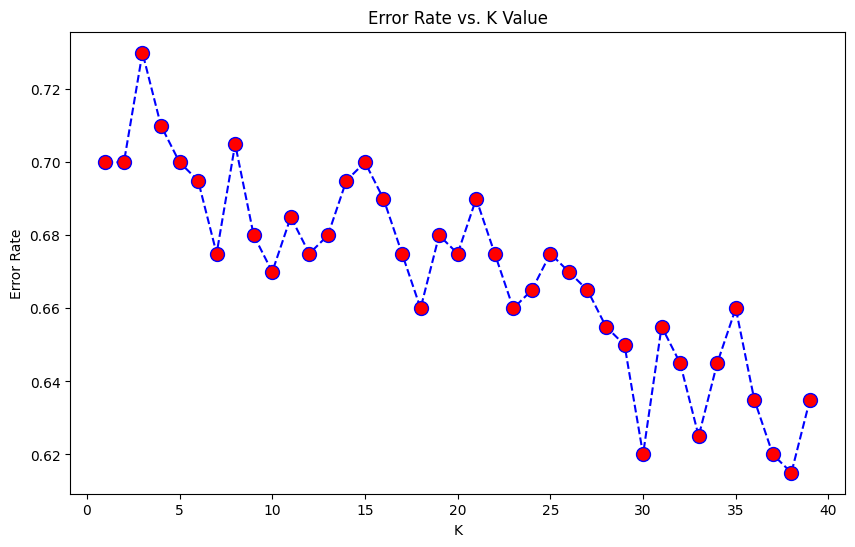

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i,weights = 'distance')
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
!pip install -q datasets
from sklearn.feature_extraction.text import CountVectorizer
from datasets import load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.2 MB/s eta 0:00:00


In [ ]:
# Load IMDB dataset
imdb = load_dataset ("imdb")
imdb_train , imdb_test = imdb ['train'], imdb ['test']


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
print( imdb_train)
print(imdb_test)

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})
Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


In [ ]:
vectorizer = CountVectorizer ( max_features =1000)
X_train = vectorizer.fit_transform ( imdb_train ['text']).toarray ()
X_test = vectorizer.transform ( imdb_test ['text']).toarray()

y_train = np.array( imdb_train['label'])
y_test = np.array( imdb_test ['label'])

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler ()
X_train = scaler.fit_transform ( X_train )
X_test = scaler.transform ( X_test )
# Build KNN Classifier
knn_classifier = KNeighborsClassifier ( n_neighbors =1, algorithm ='ball_tree')
knn_classifier.fit( X_train , y_train )
# predict test set and evaluate
y_pred = knn_classifier.predict ( X_test )
accuracy_score (y_test , y_pred )

0.60444